# Error propagation and parameter estimation
In this exercise you will experiment with error propagation and parameter inference, by applying these two techniques to artificially generated and real-world data.
The goal of this exercise is to prepare you to analyze real data that you will encounter in your lab experiments in the future.

This exercise puts in practice lecture 7 on propagation of uncertainty.

1. In Exercise 1 you will discover the power and failure modes of single variable error propagation
2. In Exercise 2 you will learn how to propagate errors through multivariate functions

Let's go!

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Ex 1: single variable error propagation
You're doing an experiment and you measure a certain unknown quantity $x_\star$, $n$ times. 
Your measurements $\pmb x=(x_1,x_2,\dots,x_n)$ are each affected by a random error: $x_i= x_\star+\epsilon_i$. The only thing you know is that $\epsilon_i$ are all independent, and that they have mean zero, i.e., $\mathbb E[\epsilon_i]=0$ for all $i$. The mean zero assumption, is quite reasonable in a lab setting and means that there is no systematic error in your measurements.


Notice that in this model we have $\mathbb E[x_i]=\mathbb E[x_\star+\epsilon_i]=x_\star+\mathbb E[\epsilon_i]=x_\star$, for all $i$. 





### Ex 1.1: Basic statistics on $\pmb x$

In the next the function `read_data(n)` reads the first `n` samples $(x_1,\dots x_n)$, from a file (for a maximum of $n=10^5$).

Set `n=30`

2. Compute and print the empirical mean of $\pmb x$, i.e., compute $\hat x=\frac{1}{n}\sum_{i=1}^n x_i$
3. Compute and print the empirical standard deviation of $\pmb x$, i.e., compute $s_x=\sqrt{\frac{1}{n-1}\sum_{i=1}^n (\hat x- x_i)^2}$.
4. Compute and print the estimated standard deviation of the mean: $s_{\hat x}=s_x/\sqrt{n}$.


In [11]:
def read_data(n):
    return np.load("data.npy")[:n]
n=30
x=read_data(n)
#TODO: compute mean, standard deviation of x, and standard deviation of the mean of x.

### Theory reminder
It often happens that we measure $x$ but we're not directly interested in $x$, instead we want to estimate $y_\star=f(x_\star)$ (as before $\star$ denotes the unknown ground truth). 

We can estimate $y_\star$ by computing $\hat y=f(\hat x)$. In other words we plug the mean of $\pmb x$ into $f()$. This has the advantage that when $\hat x\to x_\star$, then $\hat y\to y_\star$. Since $\hat x$ is a random variable, $\hat y$ is also a random variable. 
We now estimate the standard deviation of $\hat y$.

We use the error propagation formula, which is based on a first order Taylor expansion at $\mathbb E[x]=x_\star$:  $$f(\hat x)=f(x_\star)+f'(x_\star)(\hat x-x_\star)+O((\hat x-x_\star)^2).$$
Recalling that $\text{Var}(a \hat x+b)=a^2\text{Var}(\hat x)$, we get to the usual error propagation formula: 
$$\text{Var}(\hat y)\approx [f'(x_\star)]^2 \text{Var}(\hat x)$$ which you already saw in the lectures.

But there are still a two problems:
1. We don't know $x_\star$ so what do we plug in this formula? We use the approximation $x_\star\approx \hat x$, which is true if the error on the mean is sufficiently small (i.e. if we have enough samples).
2. In many cases, we don't know $\text{Var}(\hat x)$, since we don't know in advance the error that affects our measurements. To solve this we use the approximation $\text{Var}(\hat x)\approx s^2_{\hat x}= s^2_x/n$, where $s_x=\sqrt{\frac{1}{n-1}\sum_{i=1}^n (\hat x- x_i)^2}$ is our estimator of the standard deviation of $x$. 

In summary what we did was replacing the unknown quantities with their estimated values from the data.

The final formula is

$$\text{Var}(\hat y)\approx [f'(\hat x)]^2 \frac{s^2}{n}$$

### Ex 1.2
Take the function $f(x)=(x+1)^2$
1. Compute and print $\hat y=f(\hat x)$
2. Compute and print the estimated standard deviation of $\hat y$
3. The true value of $x$ is $x_\star=1$. Is $\hat x$ compatible with this value?
4. Is $\hat y$ compatible with $y_\star$=4?

How to check for compatibility? A useful heuristic to check if an estimate $\hat x \pm s_{\hat x}$ is compatible with the true value $x_\star$ is to see if $|\hat x-x_\star| \approx s_{\hat x}$ (e.g. $|\hat x-x_\star| \in  [s_{\hat x}/2,2s_{\hat x}]$)
1. If  $|\hat x-x_\star| \gg s_{\hat x}$ (e.g. $|\hat x-x_\star| > 3 s_{\hat x}$) it means that the estimate is incompatible with the true value
2. If $|\hat x-x_\star| \ll s_{\hat x}$ (e.g. $|\hat x-x_\star| < 0.2 s_{\hat x}$) it means that the estimate is compatible with the true value but the standard deviation $s_{\hat x}$ has been overestimated.
3. If $|\hat x-x_\star| \approx s_{\hat x}$ then the estimate is compatible with $x_\star$ and the standard deviation looks appropriate

You will see more about this when talking about statistical tests.

In [5]:
def f(x):
    return (x+1)**2

# TODO: compute f(x_hat), compute the standard deviation of f(x_hat) using error propagation


### Ex 1.3
So far we have first averaged our samples, and then computed $f$ on the mean $\hat x$. Could we do the reverse (i.e. first computing $f(x_i)$ for all $i$, and then taking $\hat y_2=\frac{1}{n}\sum_{i=1}^n f(x_i)$)? Let's see where this leads us.
1. Compute $\pmb y=(y_1,\dots,y_n)=(f(x_1),\dots,f(x_n))$.
2. Compute and print $\hat y_2=\frac{1}{n}\sum_{i=1}^n f(x_i)=\frac{1}{n}\sum_{i=1}^n y_i$
3. Compute and print the empirical standard deviation of $\hat y_2$. $s_{\hat{y}_2}=\frac{1}{\sqrt n}\sqrt{\frac{1}{n-1}\sum_{i=1}^n (y_i-\hat y_2)^2}$
4. Repeat the compatibility analysis done at the previous point: is $\hat y_2$ compatible with $y_\star$?

In [6]:
#TODO: compute f(x), compute y_hat_2, compute the standard deviation of y_hat_2, do a compatibility analysis

### Ex 1.4
now set $n=50000$ and recompute (by rerunning the cells) $\hat x, s_{\hat x}, \hat y,s_{\hat y}, \hat y_2,s_{\hat y_2}$.
1. Is $\hat x$ compatible with $x_\star$?
2. Is $\hat y$ compatible with $y_\star$?
3. Is $\hat y_2$ compatible with $y_\star$?


###  Bias and Variance
What is going on? Both $\hat y$ and $\hat y_2$ seem very reasonable estimators for $y_\star$
Why then when $n$ is large,  $\hat y$ is compatible with $y_\star$, while $\hat y_2$ isn't? 
To understand it let's first do a bit of theory.

Let's decompose the error of a generic estimator $\hat \theta$. Suppose that the aim is to estimate $\theta_\star$, starting from some data $(x_1,\dots,x _n)$. 
What we care about is the square error $$e(\hat \theta,\theta_\star)=\mathbb E[(\hat \theta -\theta_\star)^2],$$ where the average is over the distribution of $\hat \theta$ and hence over the randomness in data $(x_1,\dots,x_n)$ one receives. We can rewrite this error as
$$e(\hat \theta,\theta_\star)=\mathbb E\left[(\hat \theta -\mathbb E[\hat \theta]+\mathbb E[\hat \theta]-\theta_\star)^2\right]=\mathbb E\left[(\mathbb E[\hat \theta]-\theta_\star)^2\right]+\mathbb E\left[(\hat \theta- \mathbb E[\hat \theta])^2\right]+2\mathbb E\left[(\hat \theta- \mathbb E[\hat \theta])(\mathbb E[\hat \theta]-\theta_\star)\right].$$
The last term is zero since $E\left[(\hat \theta- \mathbb E[\hat \theta])(\mathbb E[\hat \theta]-\theta_\star)\right]=(\mathbb E[\hat \theta]-\theta_\star)E\left[(\hat \theta- \mathbb E[\hat \theta])\right]=0$.

We're left with the following decomposition of the error
$$e(\hat \theta,\theta_\star)=\mathbb E\left[(\mathbb E[\hat \theta]-\theta_\star)^2\right]+\mathbb E\left[(\hat \theta- \mathbb E[\hat \theta])^2\right]=\mathbb E\left[ \text{bias}(\hat \theta,\theta_\star)^2\right]+\text{Var}\left[\hat \theta\right],\qquad \text{bias}(\hat \theta,\theta_\star)=(\mathbb E[\hat \theta]-\theta_\star).$$
Hence the error is composed of two terms:
1. A variance term which quantities how much my estimator $\hat \theta$ varies when $(x_1,\dots,x_n)$ is resampled
2. A bias term that quantities the sistematic "shift" of my estimator with respect to the true value

Notice that $s_{\hat \theta}^2$ is an estimator *only* for $\text{Var}\left[\hat \theta\right]$. So either the estimator $\hat \theta$ is unbiased (i.e., the bias is zero), or we're neglecting a part of the error.
To see if this is the case, let's compute the bias for $\hat x,\hat y,\hat y_2$.


#### Bias Variance in practice
In the following cells you don't have to do anything. The plots shown below are meant to show you the bias and variance in practice.

#### Example 1: $\hat x$
Take $\theta_\star=x_\star=\mathbb E[x]$. Consider the estimator given by the empirical mean $\hat x=\frac{1}{n}\sum_{i=1}^n x_i$. Let's prove that $\hat x$ is an unbiased estimator of $\mathbb E[x]$.
We have $\mathbb E[\hat x]=\mathbb E\left[\frac{1}{n}\sum_{i=1}^n x_i\right]=\frac{1}{n}\sum_{i=1}^n \mathbb E[x_i]=\mathbb E[x]=x_\star$. Therefore the bias is zero.

We verify this below by plotting $\hat x$ for an increasing number of samples. We also plot the one standard deviation interval $[\hat x-s_{\hat x},\hat x+s_{\hat x}]$, and a horizontal line at $x_\star$.

If $\hat x$ had been biased when $n\to \infty$, it would not converge to $x_\star$.

Text(0.5, 0, 'n')

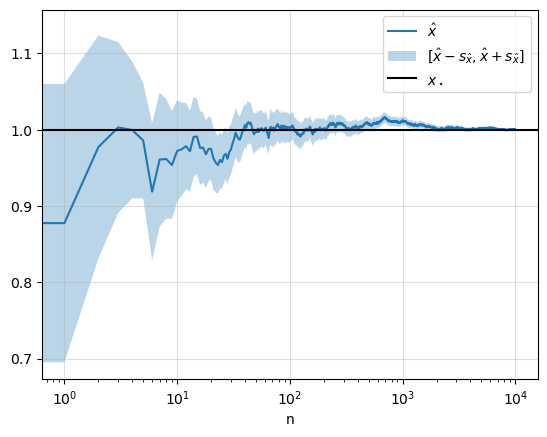

In [7]:
n=10000
x_star=1
x=read_data(n)
x_hat=np.cumsum(x)/np.arange(1,n+1)
mean_x_squared=np.cumsum(x**2)/np.arange(1,n+1)
s_x_hat=np.sqrt((mean_x_squared-x_hat**2)/np.arange(1,n+1))
plt.plot(x_hat,label="$\hat x$")
plt.fill_between(np.arange(0,n),x_hat-s_x_hat,x_hat+s_x_hat,alpha=0.3,label="$[\hat x-s_{\hat x},\hat x+s_{\hat x}]$")
plt.axhline(x_star,c="black",label="$x_\star$")
plt.plot()
plt.legend()
plt.grid(alpha=0.4)
plt.xscale('log')
plt.xlabel('n')

#### Example 2: $\hat y$
Take $\theta_\star=f(x_\star)=f(\mathbb E[x])$.  Consider the estimator $\hat y$ given by $\hat y=f(\hat x)=f\left(\frac{1}{n}\sum_{i=1}^n x_i\right)$. This estimator is asymptotically unbiased, emaning that when $n\to\infty$ the bias goes to zero.
We have $\text{bias}(\hat y,y_\star)=\mathbb E\left[f(\hat x)\right]-f(x_\star)$. When $n\to\infty$, by the law of large numbers $\hat x\to x_\star$, and thus $\text{bias}(\hat y,y_\star)\to0$.

#### Example 3: $\hat y_2$
Take $\theta_\star=f(x_\star)=f(\mathbb E[x])$.  Consider the estimator $\hat y_2$ given by $\hat y_2=\frac{1}{n}\sum_{i=1}^n f(x_i)$. This estimator is not unbiased, and even when $n\to\infty$ it has a fixed bias.
$\text{bias}(\hat y,y_\star)=\mathbb E\left[\frac{1}{n}\sum_{i=1}^n f(x_i)\right]-f(\mathbb E[x])=\mathbb E[f(x)]-f(\mathbb E[x])$. 
To see that $\mathbb E[f(x)]\neq f(\mathbb E[x])$ in general, take the following example. Let $\mathbb E[x]=0$, $\mathbb E[x^2]=1$ and $f(x)=x^2$. Then

1. $f(\mathbb E[x])=f(0)=0$
2. $\mathbb E[f(x)]=\mathbb E[x^2]=1$


Below we plot the same quantities as in the previous cell, namely $\hat y, \hat y_2$, along with their one standard deviation interval.

Observe the behavior of $\hat y_2$ for large $n$. It does not converge to $y_\star=f(x_\star)$  !!

Text(0.5, 0, 'n')

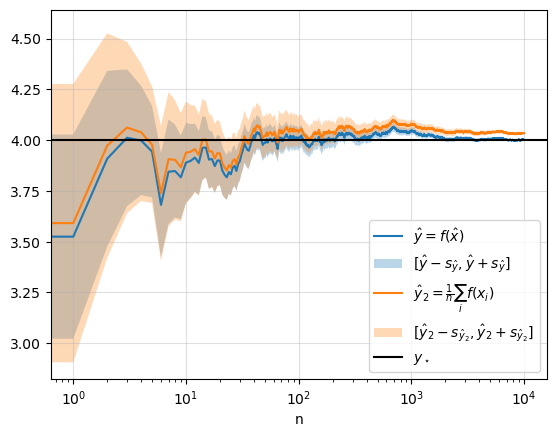

In [10]:
y_star=f(x_star)
y_hat=f(x_hat)
s_y_hat= np.sqrt((2*x_hat+1)**2*s_x_hat**2)

plt.plot(y_hat,label=r"$\hat y=f(\hat x)$")
plt.fill_between(np.arange(0,n),y_hat-s_y_hat,y_hat+s_y_hat,alpha=0.3,label="$[\hat y-s_{\hat y},\hat y+s_{\hat y}]$")

y_hat_2=np.cumsum(f(x))/np.arange(1,n+1)
mean_y_squared=np.cumsum(f(x)**2)/np.arange(1,n+1)
s_y_hat_2=np.sqrt((mean_y_squared-y_hat_2**2)/np.arange(1,n+1))
plt.plot(y_hat_2,label=r"$\hat y_2=\frac{1}{n}\sum_i f(x_i)$")

plt.fill_between(np.arange(0,n),y_hat_2-s_y_hat_2,y_hat_2+s_y_hat_2,alpha=0.3,label="$[\hat y_2-s_{\hat y_2},\hat y_2+s_{\hat y_2}]$")
plt.axhline(y_star,c="black",label="$y_\star$")
plt.plot()
plt.legend()
plt.grid(alpha=0.4)
plt.xscale('log')
plt.xlabel('n')

### Ex 1.5
After reading about the bias variance decomposition explain:
1. Why in Exercise 1.4 you observed that the value of $\hat y_2$ was not compatible with $y_\star$.
2. What is the meaning of $s_{\hat y_2}$ and why it does not capture the deviation from $y_\star$
3. Would you use $\hat y_2$ to estimate $y_\star$?

# Ex 2: multivariate error propagation
Consider error propagation through a function with $d$ variables: $f(\pmb x)=f(x_1,\dots,x_d)$. In this section the index $i\in\{1,\dots,n\}$ will run across samples, while the index $a\in\{1,\dots,d\}$ will run across variables. Moreover we use the notation $\pmb x=(x_1,\dots,x_d)$ and $\mathbb E[\pmb x]=\left(\mathbb E[x_1],\dots,\mathbb E[x_d]\right)$.  

The empirical mean $\hat {\pmb x}$ is $\hat {\pmb x}=(\hat x_1,\dots,\hat x_d)$, with $\hat x_a=\frac{1}{n}\sum_{i=1}^n x_{ai}$.
Similarly one can associate an empirical standard deviation $s_a$ to each coordinate. We define $y=f(\hat{\pmb x})$.

In the lecture part 7.3 you saw two formulas for propagating errors through functions:

1. $\text{Var}(f(x))=\sum_{a=1}^d \left(\frac{\partial f}{\partial x_a}(\mathbb E [\pmb x])\right)^2 \text{Var}(x_a),$ which is **valid when all $x_a$ are uncorrelated**. When we estimate the mean $\hat{\pmb x}$ and the standard deviations $\{s_a\}$ this formula becomes $$s_y=\sqrt{\sum_{a=1}^d \left(\frac{\partial f}{\partial x_a}(\hat {\pmb x})\right)^2 s_a^2},$$ where $s_y$ is the standard deviation of $f(\hat{\pmb x})$ and $s_a$ is the standard deviation of the empirical mean of $x_a$.  
2. If we suspect our variables to be correlated, then one can use the more conservative (meaning it gives larger errors) formula $\sigma_y=\sum_{a=1}^d \left|\frac{\partial f}{\partial x_a}(\mathbb E[\pmb x])\right| \sigma_a$, where $\sigma_a^2=\text{Var}(x_a)$. Replacing mean and variance with their empirical estimates gives

$$s_y=\sum_{a=1}^d \left|\frac{\partial f}{\partial x_a}(\hat {\pmb x})\right| s_a,$$ which one can directly apply to data.

### Multivariate error propagation in theory
In a lab experiment you want to estimate the calorific value $H_C^\star$ of a combustible (meaning the energy per unit of mass one obtains when burning the combustible).


We compute this quantity by burning a mass $m_c$ (`mc` in the code) of combustible and using the heat to increase the temperature of a mass $M$ of water by $\Delta T$ (`DT` in the code). We repeat this procedure several times. In the next code cell you can find the values of $m_c, M,\Delta T$ obtained in different repetitions.



One can then compute the calorific value as $$H_C= c\frac{ M\Delta T}{m_c},\quad c=4.184 \,\text{J} \cdot\text{g}^{-1} \text{K}^{-1}.$$

Based on the previous exercise your first reflex would be to compute the mean of $M$, $\Delta T$, $m_c$, and then plug these into the formula for $H_C$. But this is wrong, let's see why.
In this example there are no unique true values $m_c^\star,\Delta T^\star, M^\star$ that give $H_C^\star$. Instead one can obtain $H_C^\star$ from several different combinations of $M,\Delta T,m_c$.
For example both $M=500,\Delta T=4,m_c=0.2$ and $M=1000,\Delta T=2,m_c=0.2$ give $H_C=10^5$. And it is indeed likely that in different realizations of the experiment one finds himself with completely different values of $M$, $\Delta T$, $m_c$, which all give similar $H_C$. 

The best thing to do in this case is to compute a different estimate of $H_C$ from each combination of $M$, $\Delta T$, $m_c$. In other words we will have
$$(H_C)_i= c\frac{ M_i\Delta T_i}{(m_c)_i},\quad i\in\{1,\dots,n\}$$

For each $(H_C)_i$ we propagate the uncertainty of the measurement onto $H_C$, finding the standard deviation $(s_{H_C})_i$. We do so by using the uncertainties given by the sensitivity of the measuring instruments (scales and thermometer). Hence in this case one does not need to estimate the standard deviation from data.
The measurements of $m_c$, $\Delta T$, $M$ are all affected by errors $\sigma_{m_c}=0.029\,g,\;\sigma_{M}=14 \,g$, $\sigma_{\Delta T}=0.058\, K$.
Propagating the uncertainties will give us $(\sigma_{H_C})_i$, i.e., the standard deviation of the $i-th$ estimate of $H_C$.

To estimate $H_C^\star$ we compute $$\hat H_C=\frac{1}{n}\sum_{i=1}^n (H_C)_i$$




### Ex 2.1: analytical error propagation
Apply both (the one for uncorrelated and the conservative one) error propagation formulas to $H_C$ to find an analytical expression for $s_{H_C}$.

### Ex 2.2: numerical error propagation
In the next code cell you can find the values of $m_c, M,\Delta T$ obtained in $n=10$ repetitions of the experiment. 
1. For each sample $i\in\{1,\dots,n \}$ compute $(H_C)_i$ using the formula given above.
2. For each $i\in\{1,\dots, n\}$ compute $(s_{H_c})_i$ (i.e., the uncertainty on $(H_C)_i$) by using the formulas you derived in Ex 2.1. You should obtain two arrays of uncertainties. The length of each array is the same as the number $n$ samples.
3. Verify (by printing the uncertainties on $H_C$) that the conservative uncertainties are indeed larger than the ones assuming no correlation
4. Which of the two uncertaities (uncorrelated or conservative) does it make sense to use in this setting? Is it reasonable to assume that the errors on $M,m_c,\Delta T$ are uncorrelated within each experiment?

*Hint: recall that one measures $M,m_c,\Delta T$ by reading them from the respective measuring instruments (scales and thermometer)*

In [12]:
M=np.array([513.95,440,600,515,574.09,523,577,593.19,670,728])
DT=np.array([4.60,4.70,4.70,4.70,4.70,4.50,4.50,4.30,4.10,3.90])
mc=np.array([0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20])
#TODO: compute HC using each sample. Propagate the uncertainties onto HC. Verify that the conservative uncertainties are indeed larger than the uncertainties that assume the variables are uncorrelated.

#### Ex 2.3.1
Since we want a single estimate of $H_C^\star$ we now average all the measurements of $H_C$.
Propagate analytically the errors $(s_{H_C})_i$  (use the errors obtained using the uncorrelated formula) onto $H_C$. 
In this case it is safer to use the conservative formula for correlated errors because the measurements taken in different experiments could be correlated. For example it is possible that when repeating the experiment several times, the state of experimental apparatus (e.g. the temperature of the calorimeter) is changed slightly every time, introducing correlations between successive measurements.

Write down analytically the error propagation formula for $\hat H_C$.

#### Ex 2.3.2
1. Compute and print $\hat H_C$
2. Compute and print the standard deviation of $\hat H_C$ numerically.


In [ ]:
#TODO: compute and print the mean HC_hat, propagate the error onto HC_hat